In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small")


In [29]:
print(f"Training data: {len(os.listdir(new_base_dir / 'train'))}")
print(f"Validation data: {len(os.listdir(new_base_dir / 'validation'))}")
print(f"Test data: {len(os.listdir(new_base_dir / 'test'))}")


Training data: 2
Validation data: 2
Test data: 2


In [9]:
#Setup data generators with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_base_dir / 'train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    new_base_dir / 'validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
#Create simple convnet model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input

# Define the input shape
input_shape = (28, 28, 1)

# Create the model
model = models.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


KeyboardInterrupt: 

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 111ms/step - accuracy: 0.8767 - loss: 0.3946 - val_accuracy: 0.9815 - val_loss: 0.0602
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9873 - val_loss: 0.0454
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 0.9884 - val_loss: 0.0419
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9891 - val_loss: 0.0413
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.9951 - loss: 0.0166 - val_accuracy: 0.9895 - val_loss: 0.0382
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9913 - loss: 0.0374
Test accuracy: 0.993


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(full_train_images, full_train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Select a subset of the data
train_images = full_train_images[:1000]
train_labels = full_train_labels[:1000]
val_images = full_train_images[1000:1500]
val_labels = full_train_labels[1000:1500]
test_images = test_images[:500]
test_labels = test_labels[:500]

# Reshape and normalize the images
train_images = train_images.reshape((1000, 28, 28, 1)).astype('float32') / 255
val_images = val_images.reshape((500, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((500, 28, 28, 1)).astype('float32') / 255

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to reduce overfitting
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    batch_size=64,
                    validation_data=(val_images, val_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.1709 - loss: 2.2362 - val_accuracy: 0.5520 - val_loss: 1.8386
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4874 - loss: 1.6695 - val_accuracy: 0.7660 - val_loss: 0.9726
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6605 - loss: 1.0338 - val_accuracy: 0.8280 - val_loss: 0.6712
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7695 - loss: 0.7073 - val_accuracy: 0.8500 - val_loss: 0.5034
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8200 - loss: 0.5710 - val_accuracy: 0.8780 - val_loss: 0.4297
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8622 - loss: 0.4718 - val_accuracy: 0.9060 - val_loss: 0.3650
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8797 - loss: 0.4088 - val_accuracy: 0.9100 - val_loss: 0.3497
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8943 - loss: 0.3579 - val_accuracy: 0.9080 - v

In [33]:
#Question2

train_dir = '/content/drive/MyDrive/cats_vs_dogs_small/train'
validation_dir = '/content/drive/MyDrive/cats_vs_dogs_small/validation'
test_dir = '/content/drive/MyDrive/cats_vs_dogs_small/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
from tensorflow.keras import optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])



In [41]:
test_loss, test_acc = model.evaluate(test_generator, steps=16)
print(f'Test accuracy: {test_acc:.3f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.5030 - loss: 0.6935
Test accuracy: 0.525


In [42]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create image data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create image data generators for validation and test (only rescaling)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = valid_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = valid_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Model architecture with batch normalization
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with increased learning rate
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['accuracy'])

# Train the model for more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=63,  # 2000 samples / 32 batch size
    epochs=27,
    validation_data=validation_generator,
    validation_steps=31  # 1000 samples / 32 batch size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=31)
print(f'Test accuracy: {test_acc:.3f}')

# Plot training and validation accuracy/loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 410s 6s/step - accuracy: 0.5509 - loss: 3.6599 - val_accuracy: 0.4970 - val_loss: 0.7128
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 502s 7s/step - accuracy: 0.5771 - loss: 0.7804 - val_accuracy: 0.5081 - val_loss: 0.9820
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 440s 7s/step - accuracy: 0.5586 - loss: 0.7298 - val_accuracy: 0.5413 - val_loss: 0.6908
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 410s 6s/step - accuracy: 0.6347 - loss: 0.6606 - val_accuracy: 0.5030 - val_loss: 0.9366
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 406s 6s/step - accuracy: 0.6385 - loss: 0.6614 - val_accuracy: 0.5927 - val_loss: 0.6979
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 441s 6s/step - accuracy: 0.6456 - loss: 0.6423 - val_accuracy: 0.5222 - val_loss: 1.0177
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 502s 7s/step - accuracy: 0.6711 - loss: 0.6157 - val_accuracy: 0.6482 - va

KeyboardInterrupt: 

In [43]:
test_loss, test_acc = model.evaluate(test_generator, steps=31)
print(f'Test accuracy: {test_acc:.3f}')


31/31 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7922 - loss: 0.4709
Test accuracy: 0.785


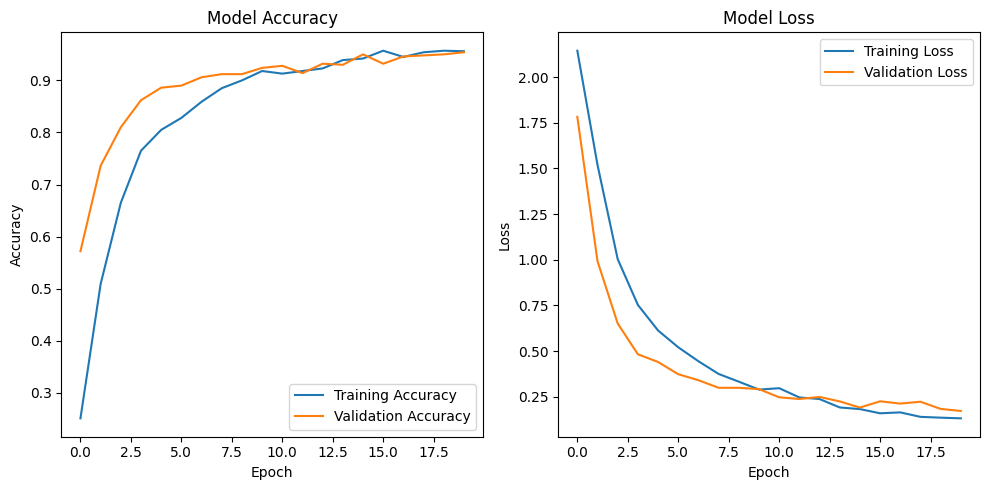

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 408s 6s/step - accuracy: 0.5586 - loss: 1.1844 - val_accuracy: 0.5039 - val_loss: 1.1044
Epoch 2/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 443s 7s/step - accuracy: 0.5912 - loss: 0.9205 - val_accuracy: 0.4922 - val_loss: 1.8142
Epoch 3/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 461s 6s/step - accuracy: 0.6084 - loss: 0.8490 - val_accuracy: 0.5020 - val_loss: 1.9008
Epoch 4/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 440s 7s/step - accuracy: 0.6422 - loss: 0.7438 - val_accuracy: 0.4980 - val_loss: 2.3180
Epoch 5/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 399s 6s/step - accuracy: 0.6388 - loss: 0.7646 - val_accuracy: 0.5371 - val_loss: 1.1833
Epoch 6/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 438s 6s/step - accuracy: 0.6719 - loss: 0.6911 - val_accuracy: 0.5449 - val_loss: 1.3007
Epoch 7/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.6761 - loss: 0.6467 - val_accuracy: 0.5566 - va

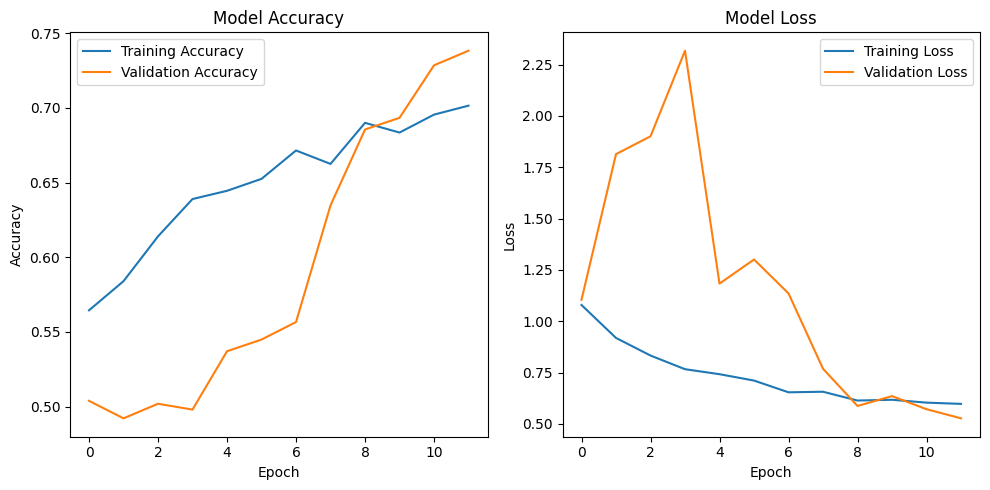

In [45]:
#Question3


from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create image data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create image data generators for validation and test (only rescaling)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = valid_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = valid_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Model architecture with batch normalization
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with increased learning rate
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Train the model for 12 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=63,  # Adjust based on your training sample size
    epochs=12,
    validation_data=validation_generator,
    validation_steps=16
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=16)
print(f'Test accuracy: {test_acc:.3f}')

# Plot training and validation accuracy/loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 706s 11s/step - accuracy: 0.6055 - loss: 0.7398 - val_accuracy: 0.8691 - val_loss: 0.3541
Epoch 2/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 801s 12s/step - accuracy: 0.7814 - loss: 0.4720 - val_accuracy: 0.8496 - val_loss: 0.3376
Epoch 3/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 742s 11s/step - accuracy: 0.7992 - loss: 0.4487 - val_accuracy: 0.8672 - val_loss: 0.3196
Epoch 4/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 802s 12s/step - accuracy: 0.8310 - loss: 0.3744 - val_accuracy: 0.8809 - val_loss: 0.2895
Epoch 5/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 743s 12s/step - accuracy: 0.8213 - loss: 0.4067 - val_accuracy: 0.8926 - val_loss: 0.2408
Epoch 6/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 740s 12s/step - accuracy: 0.8446 - loss: 0.3540 - val_accuracy: 0.8848 - val_loss: 0.2792
Epoch 7/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 696s 11s/step - a

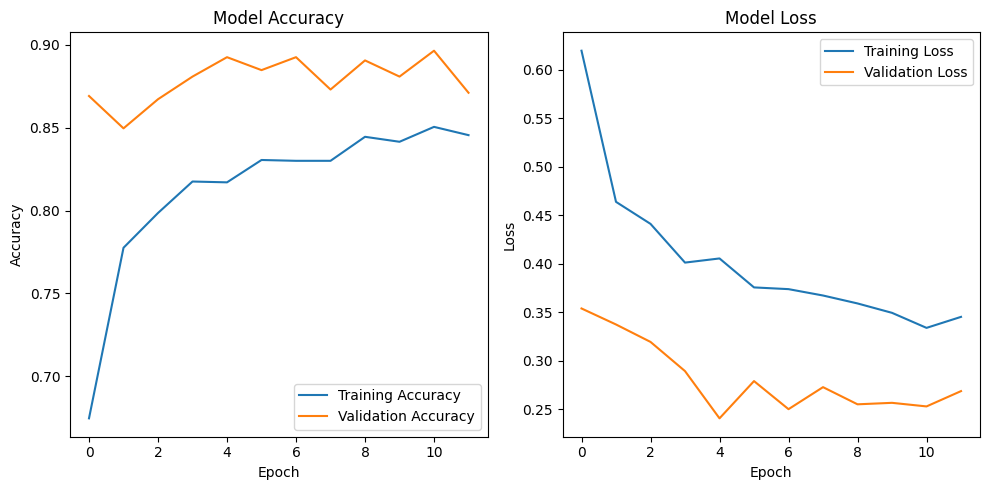

In [46]:
#Question 4

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the VGG16 model without the top dense layers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Create a new model with custom classifier on top
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Data generators (same as in previous steps)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = valid_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = valid_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_small/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Train only the custom classifier
history = model.fit(
    train_generator,
    steps_per_epoch=63,  # Adjust based on training sample size
    epochs=12,  # Start with fewer epochs to save time
    validation_data=validation_generator,
    validation_steps=16
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator, steps=16)
print(f'Test accuracy: {test_acc:.3f}')

# Plot training and validation accuracy/loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
